In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import os
train_image_files_path="/content/drive/MyDrive/BTL_AI/BTL_AI/DATA/Train"
valid_image_files_path="/content/drive/MyDrive/BTL_AI/BTL_AI/DATA/Validation"

In [ ]:
label=['Bike','Bus','Car','Motorbike','Truck']

In [ ]:
#Chuẩn hóa ảnh về 0:1: rescale
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data_gen = ImageDataGenerator(rescale=1/255)
validation_data_gen = ImageDataGenerator(rescale=1/255)

In [ ]:
#Doc 2 du lieu train, validation va gan nhan
train_generator = train_data_gen.flow_from_directory(
    train_image_files_path,
    target_size=(50,50),
    batch_size=32,
    class_mode='categorical')
validation_generator = validation_data_gen.flow_from_directory(
    valid_image_files_path,
    target_size=(50,50),
    batch_size=32,
    class_mode='categorical')

Found 317 images belonging to 5 classes.
Found 81 images belonging to 5 classes.


In [ ]:
#Xây dựng mô hình
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
model = tf.keras.models.Sequential()

#Lowps CNN1
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(50,50,3)))
model.add(MaxPooling2D(2,2))

#Lowps CNN2
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

#Lowps CNN3
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

#Lowps CNN4
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

#Chuyen du lieu dau ra cua mang CNN tu mang 2 chieu ve mang 1 chieu
model.add(Flatten())

#Lop an
model.add(Dense(512, activation=tf.nn.relu))

#Lop output
model.add(Dense(5, activation=tf.nn.softmax)) #5 dau ra

In [ ]:
#Thiet lap tham so de huan luyen mo hinh
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer = RMSprop(lr=0.001),
              metrics=['acc'])

In [ ]:
EPOCHS = 300
history=model.fit(
    train_generator,
    steps_per_epoch=2,
    epochs=EPOCHS,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=2)

Epoch 1/300
2/2 [==============================] - 11s 9s/step - loss: 4.8826e-05 - accuracy: 1.0000 - val_loss: 0.0619 - val_accuracy: 0.8125
Epoch 2/300
2/2 [==============================] - 5s 4s/step - loss: 8.9906e-05 - accuracy: 1.0000 - val_loss: 0.0814 - val_accuracy: 0.7344
Epoch 3/300
2/2 [==============================] - 4s 3s/step - loss: 0.0067 - accuracy: 0.9836 - val_loss: 0.0817 - val_accuracy: 0.7344
Epoch 4/300
2/2 [==============================] - 4s 4s/step - loss: 1.4345e-04 - accuracy: 1.0000 - val_loss: 0.0748 - val_accuracy: 0.7500
Epoch 5/300
2/2 [==============================] - 7s 6s/step - loss: 8.5781e-05 - accuracy: 1.0000 - val_loss: 0.0689 - val_accuracy: 0.7500
Epoch 6/300
2/2 [==============================] - 6s 6s/step - loss: 1.6678e-04 - accuracy: 1.0000 - val_loss: 0.0701 - val_accuracy: 0.7500
Epoch 7/300
2/2 [==============================] - 4s 3s/step - loss: 9.5001e-05 - accuracy: 1.0000 - val_loss: 0.0747 - val_accuracy: 0.7344
Epoch 8/3

Saving 01-8-1474296974.jpg to 01-8-1474296974.jpg


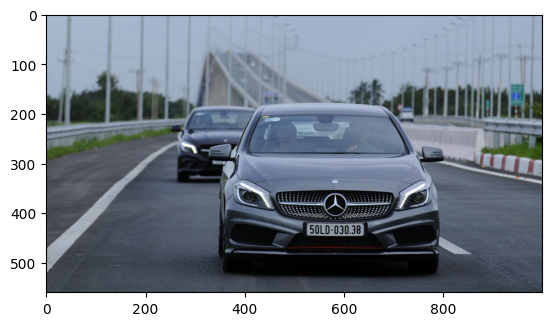

1/1 [==============================] - 0s 35ms/step
[[1.1505526e-08 4.0504051e-06 6.6332510e-03 2.8535769e-08 9.9336267e-01]]
Giá trị dự đoán:  Truck


In [ ]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Upload the image file
anh_upload = files.upload()

for anh in anh_upload.keys():
    # Đường dẫn tới tệp ảnh đã tải lên
    path = '/content/' + anh

    # Hiển thị ảnh đã tải lên
    plt.imshow(mpimg.imread(path))
    plt.show()

    # Tải ảnh với kích thước mục tiêu (50, 50)
    img = image.load_img(path, target_size=(50, 50))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0  # Chuẩn hóa ảnh (nếu mô hình của bạn yêu cầu chuẩn hóa)

    # Dự đoán
    images = np.vstack([x])
    y_pred = model.predict(images, batch_size=10)

    # Hiển thị kết quả dự đoán
    print(y_pred)
    print('Giá trị dự đoán: ', label[np.argmax(y_pred)])

In [ ]:
loss, accuracy = model.evaluate(validation_generator)
print(f'Độ chính xác: {accuracy}')

3/3 [==============================] - 3s 797ms/step - loss: 1.7305 - acc: 0.5309
Độ chính xác: 0.5308641791343689


In [ ]:
def custom_loss_function(y_true, y_pred):
    loss = tf.reduce_mean(tf.square(y_true - y_pred))
    return loss

model.compile(optimizer='adam', loss=custom_loss_function, metrics=['accuracy'])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Dự đoán trên tập kiểm tra
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = validation_generator.classes

# Báo cáo phân loại
print('Classification Report')
print(classification_report(y_true, y_pred, target_names=label))

# Ma trận nhầm lẫn
print('Confusion Matrix')
print(confusion_matrix(y_true, y_pred))


3/3 [==============================] - 3s 777ms/step
Classification Report
              precision    recall  f1-score   support

        Bike       0.07      0.06      0.06        17
         Bus       0.20      0.71      0.31        14
         Car       0.00      0.00      0.00        15
   Motorbike       0.00      0.00      0.00        14
       Truck       0.25      0.10      0.14        21

    accuracy                           0.16        81
   macro avg       0.10      0.17      0.10        81
weighted avg       0.11      0.16      0.10        81

Confusion Matrix
[[ 1 10  0  3  3]
 [ 4 10  0  0  0]
 [ 4  9  0  0  2]
 [ 1 12  0  0  1]
 [ 4  9  1  5  2]]


In [ ]:
import time
# Tính thời gian huấn luyện
start_time = time.time()

history = model.fit(
train_generator,
epochs=10,
validation_data=validation_generator
)

end_time = time.time()
training_time = end_time - start_time
print(f'Thời gian huấn luyện: {training_time:.2f} giây')

Epoch 1/10
 1/10 [==>...........................] - ETA: 21s - loss: 0.0964 - accuracy: 0.6875

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


10/10 [==============================] - 13s 1s/step - loss: 0.0328 - accuracy: 0.9054 - val_loss: 0.0856 - val_accuracy: 0.6667
Epoch 2/10
10/10 [==============================] - 12s 1s/step - loss: 0.0172 - accuracy: 0.9590 - val_loss: 0.0981 - val_accuracy: 0.6420
Epoch 3/10
10/10 [==============================] - 9s 913ms/step - loss: 0.0164 - accuracy: 0.9464 - val_loss: 0.0749 - val_accuracy: 0.6914
Epoch 4/10
10/10 [==============================] - 10s 1s/step - loss: 0.0102 - accuracy: 0.9811 - val_loss: 0.0733 - val_accuracy: 0.7531
Epoch 5/10
10/10 [==============================] - 12s 1s/step - loss: 0.0079 - accuracy: 0.9779 - val_loss: 0.0678 - val_accuracy: 0.7531
Epoch 6/10
10/10 [==============================] - 9s 886ms/step - loss: 0.0037 - accuracy: 0.9937 - val_loss: 0.0672 - val_accuracy: 0.7654
Epoch 7/10
10/10 [==============================] - 10s 965ms/step - loss: 0.0025 - accuracy: 0.9968 - val_loss: 0.0772 - val_accuracy: 0.7407
Epoch 8/10
10/10 [======